In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly

import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('data-final.csv', delimiter='\t')

In [3]:
data.shape

(1015341, 110)

In [4]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [5]:
#Check Missing Value
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  186358
Number of participants after eliminating missing values:  1012050


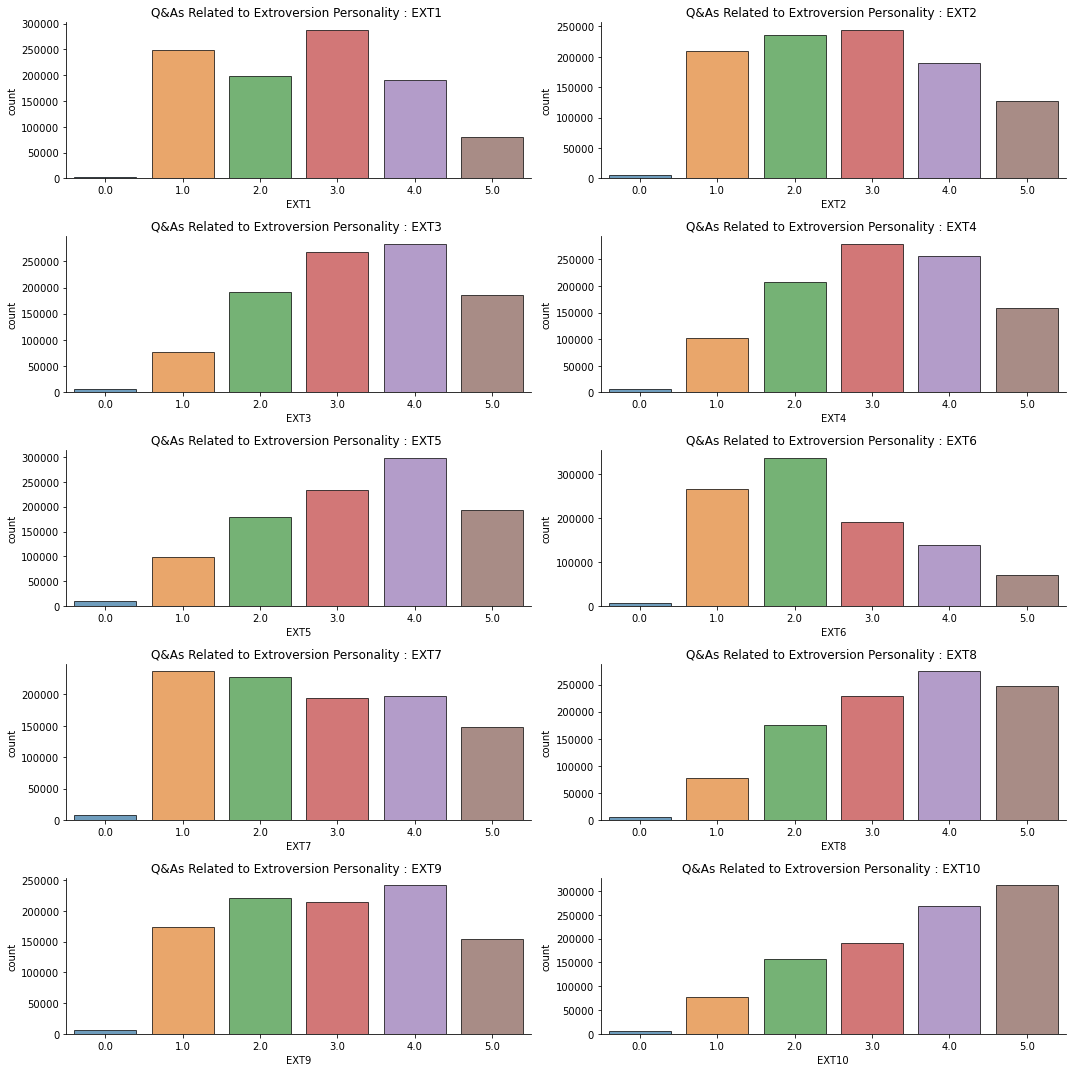

In [6]:
#barplots showing the frequency of each category
plt.figure(figsize=[15,15])
fft=['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Extroversion Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

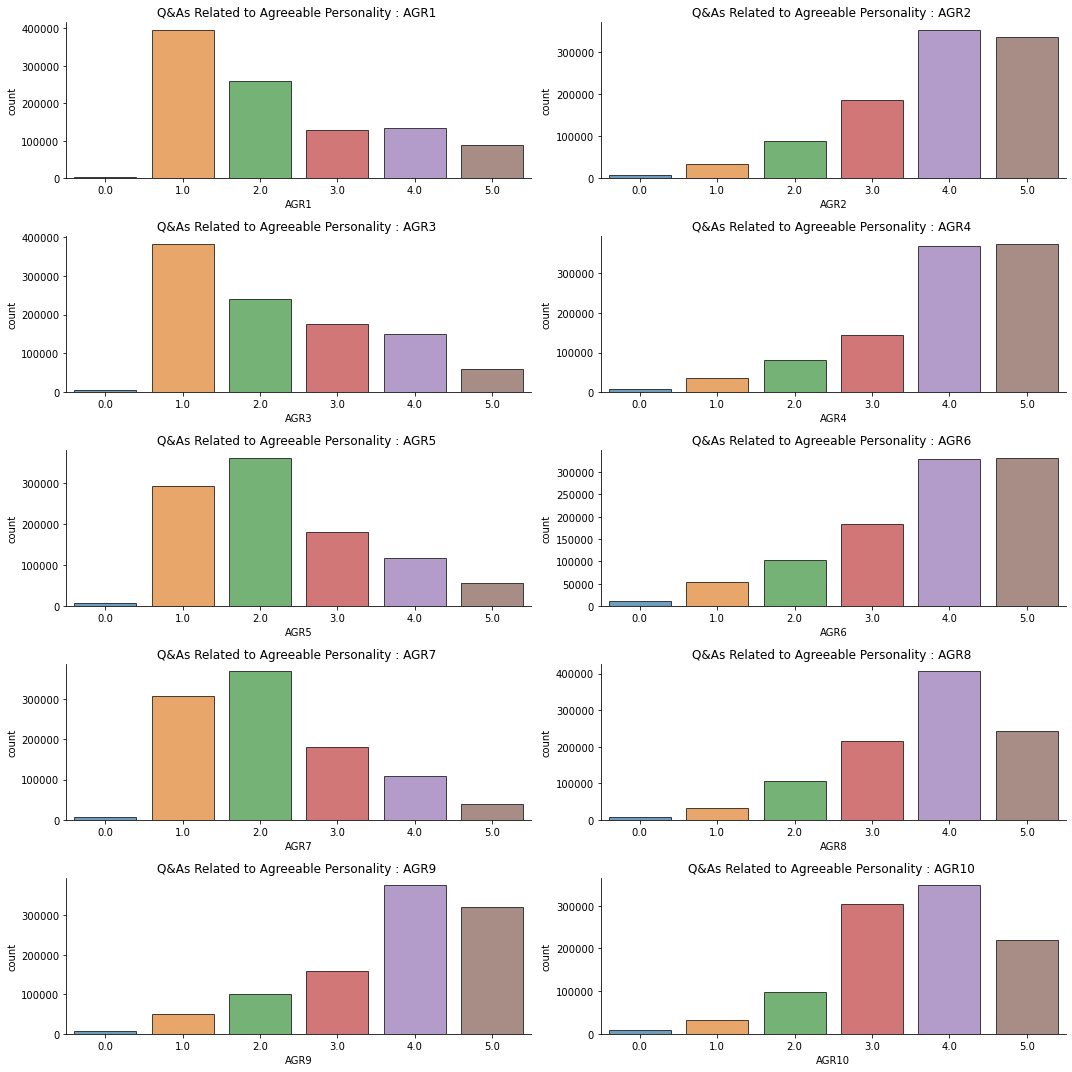

In [7]:
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

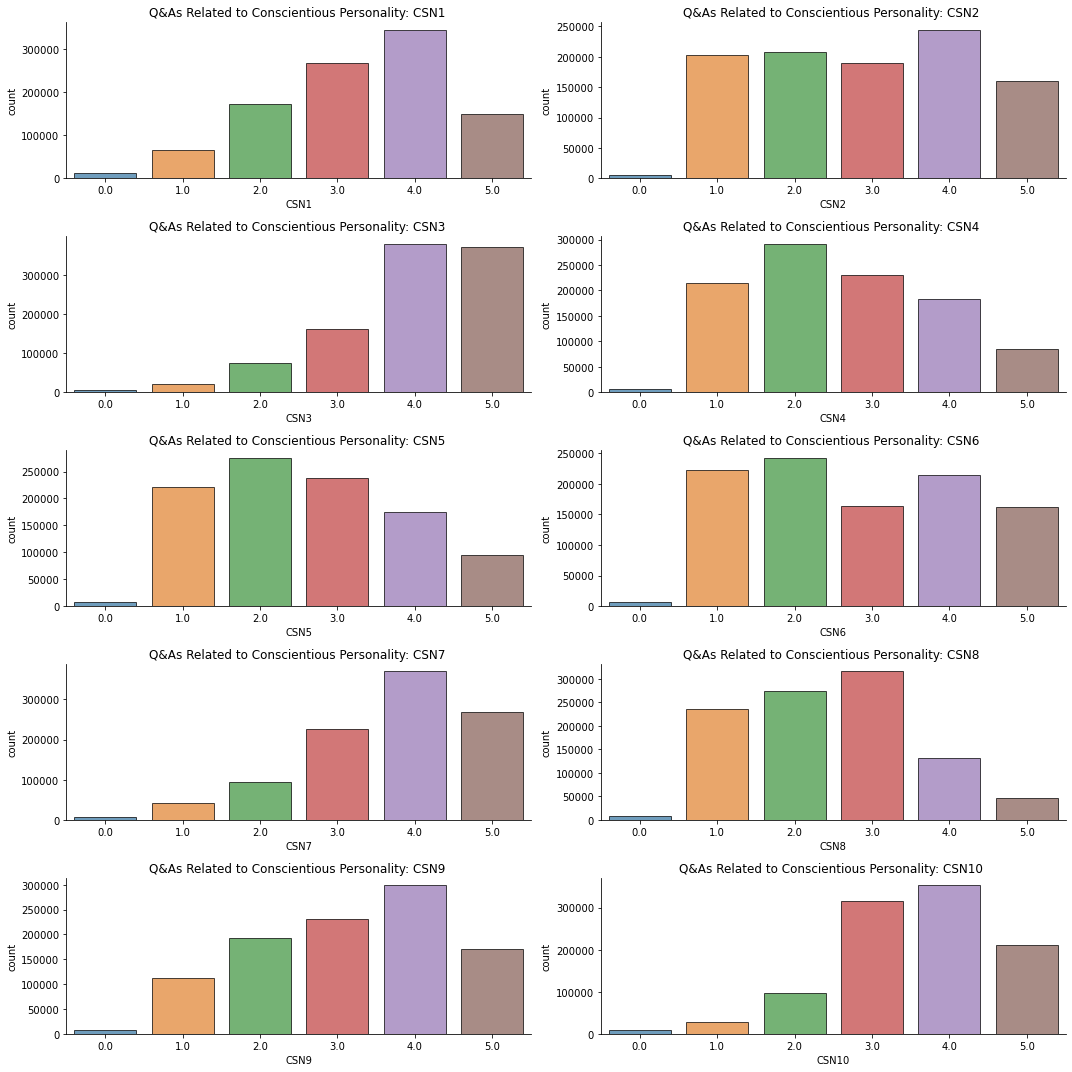

In [8]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Conscientious Personality: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

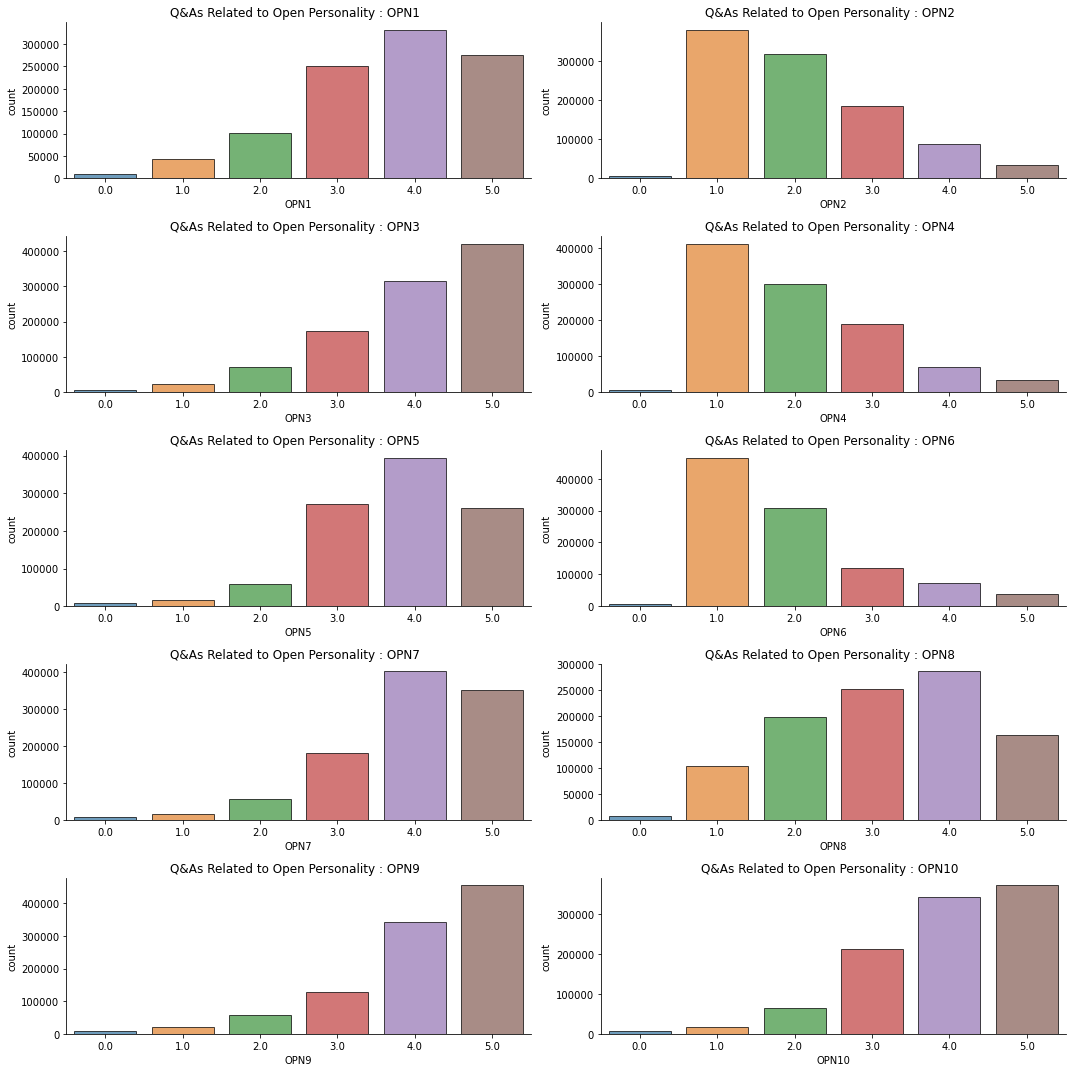

In [9]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Open Personality : {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [10]:
continents= pd.read_csv('continents2.csv')
continents.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [11]:
data1=data.copy()
data1['alpha-2']=data1['country']

In [12]:
continents = data1.merge(continents, on=["alpha-2"], how='left')

 Extroversion Personality

In [13]:
EP_lst = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10'] 
EP_df = continents.groupby(["region"])[EP_lst].count()
EP_df.columns = ['I am the life of the party','I dont talk a lot','I feel comfortable around people',
                'I keep in the background','I start conversations','I have little to say',
                'I talk to a lot of different people at parties','I dont like to draw attention to myself',
                'I dont mind being the center of attention','I am quiet around strangers']
EP_df = EP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
EP_df = EP_df.T

EP_df["World"] = EP_df.sum(axis=1)
EP_df = EP_df.sort_values(by="World", ascending=True)
EP_df["Min"] = EP_df.min(axis=1)
EP_df["Max"] = EP_df.max(axis=1)

C:\Users\DELL\AppData\Local\Temp/ipykernel_19592/89215152.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(y_label)


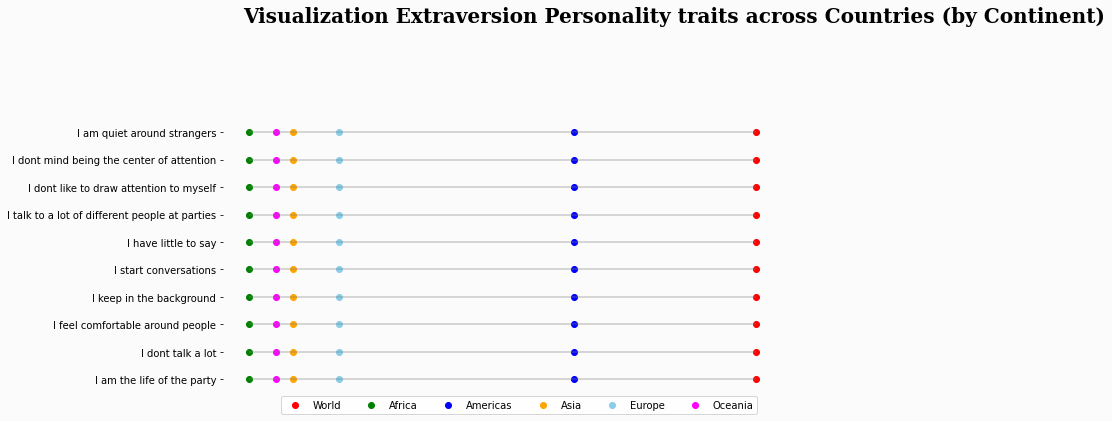

In [14]:
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(EP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=EP_df["Min"], xmax=EP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(EP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(EP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(EP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(EP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(EP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(EP_df['Oceania'], y_dummy, color='magenta', label='Oceania')

y_label = list(EP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Extraversion Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif') 



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [15]:
display(continents[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

In [ ]:
continents[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Extroversion Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Extroversion Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

Neuroticism Personality

In [17]:
NP_lst = ['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10'] 
NP_df = continents.groupby(["region"])[NP_lst].count()
NP_df.columns = ['I get stressed out easily', 'I am relaxed most of the time','I worry about things',
                'I seldom feel blue','I am easily disturbed','I get upset easily','I change my mood a lot',
                'I have frequent mood swings','I get irritated easily','I often feel blue']
NP_df = NP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
NP_df = NP_df.T

NP_df["World"] = NP_df.sum(axis=1)
NP_df = NP_df.sort_values(by="World", ascending=True)
NP_df["Min"] = NP_df.min(axis=1)
NP_df["Max"] = NP_df.max(axis=1)

C:\Users\DELL\AppData\Local\Temp/ipykernel_7432/1688244249.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(y_label)


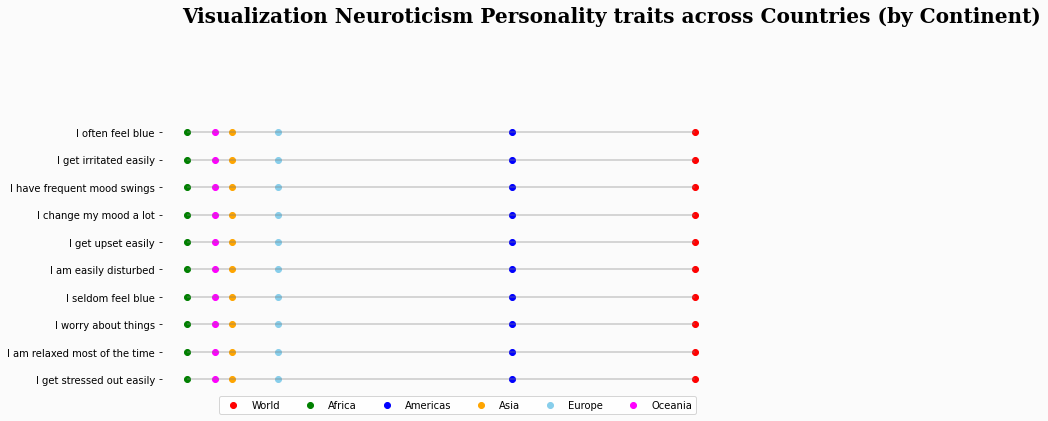

In [18]:
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(NP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=NP_df["Min"], xmax=NP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(NP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(NP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(NP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(NP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(NP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(NP_df['Oceania'], y_dummy, color='magenta', label='Oceania')


y_label = list(NP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Neuroticism Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif')



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [19]:
display(continents[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

In [ ]:
continents[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Neuroticism Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Neuroticism Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

Agreeable Personality

In [ ]:
AP_lst = ['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10'] 
AP_df = continents.groupby(["region"])[AP_lst].count()
AP_df.columns = ['I feel little concern for others','I am interested in people','I insult people','I sympathize with others feelings',
                'I am not interested in other peoples problems','I have a soft heart',
                'I am not really interested in others','I take time out for others',
                'I feel others emotions','I make people feel at ease']
AP_df = AP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
AP_df = AP_df.T

AP_df["World"] = AP_df.sum(axis=1)
AP_df = AP_df.sort_values(by="World", ascending=True)
AP_df["Min"] = AP_df.min(axis=1)
AP_df["Max"] = AP_df.max(axis=1)

In [ ]:
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(AP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=AP_df["Min"], xmax=AP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(AP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(AP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(AP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(AP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(AP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(AP_df['Oceania'], y_dummy, color='magenta', label='Oceania')


y_label = list(AP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Agreeable Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif')



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [ ]:
display(continents[['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

In [ ]:
continents[['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Agreeable Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Agreeable Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

Conscientious Personality

In [ ]:
CP_lst = ['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10'] 
CP_df = continents.groupby(["region"])[CP_lst].count()
CP_df.columns = ['I am always prepared','I leave my belongings around',
                'I pay attention to details','I make a mess of things',
                'I get chores done right away','I often forget to put things back in their proper place',
                'I like order','I shirk my duties',
                'I follow a schedule','I am exacting in my work']
CP_df = CP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
CP_df = CP_df.T

CP_df["World"] = CP_df.sum(axis=1)
CP_df = CP_df.sort_values(by="World", ascending=True)
CP_df["Min"] = CP_df.min(axis=1)
CP_df["Max"] = CP_df.max(axis=1)

In [ ]:
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(CP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=CP_df["Min"], xmax=CP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(CP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(CP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(CP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(CP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(CP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(CP_df['Oceania'], y_dummy, color='magenta', label='Oceania')

y_label = list(CP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Conscientious Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif')



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [ ]:
display(continents[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

In [ ]:
continents[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Conscientious Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Conscientious Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

Open Personality

In [ ]:
OP_lst = ['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10'] 
OP_df = continents.groupby(["region"])[OP_lst].count()
OP_df.columns = ['I have a rich vocabulary','I have difficulty understanding abstract ideas',
                'I have a vivid imagination','I am not interested in abstract ideas',
                'I have excellent ideas','I do not have a good imagination',
                'I am quick to understand things','I use difficult words',
                'I spend time reflecting on things','I am full of ideas']
OP_df = OP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
OP_df = OP_df.T

OP_df["World"] = OP_df.sum(axis=1)
OP_df = OP_df.sort_values(by="World", ascending=True)
OP_df["Min"] = OP_df.min(axis=1)
OP_df["Max"] = OP_df.max(axis=1)

In [ ]:
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(OP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=OP_df["Min"], xmax=OP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(OP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(OP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(OP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(OP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(OP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(OP_df['Oceania'], y_dummy, color='magenta', label='Oceania')

y_label = list(OP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Open Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif')



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [ ]:
display(continents[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

In [ ]:
continents[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Open Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Open Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

# Clustering

In [ ]:
X=data.copy()
X.drop(X.columns[50:107], axis=1, inplace=True)
X.drop(X.columns[51:], axis=1, inplace=True)

 K-means

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

df_model = X.drop('country', axis=1)

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

In [ ]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

TSNE

In [ ]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=2).fit_transform(df_pca)
dftsne = pd.DataFrame(data=Xtsne , columns = ['x1','x2'])
dftsne['cluster'] = predictions
dftsne.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full", palette='tab10', alpha=0.8)
plt.title('Personality Clusters Visualized on TSNE 2D');